In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WR14AgrONgRJA5YeSDmD")
project = rf.workspace("intership-rgrmn").project("flower-iris-otght")
version = project.version(1)
dataset = version.download("coco")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to flower-iris-1 in coco:: 100%|█████████████████████████| 7/7 [00:00<00:00, 587.10it/s]


loading Roboflow workspace...
loading Roboflow project...


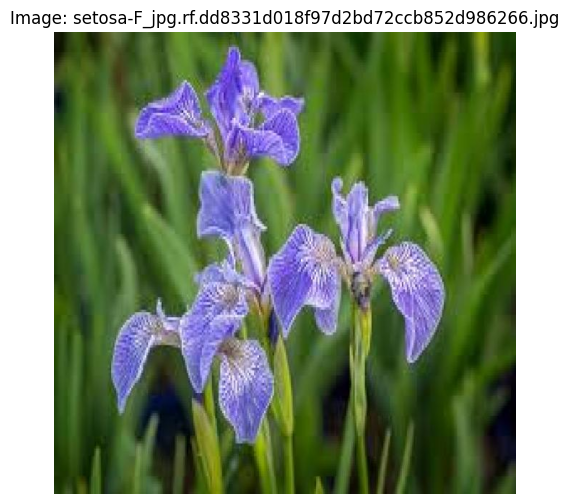

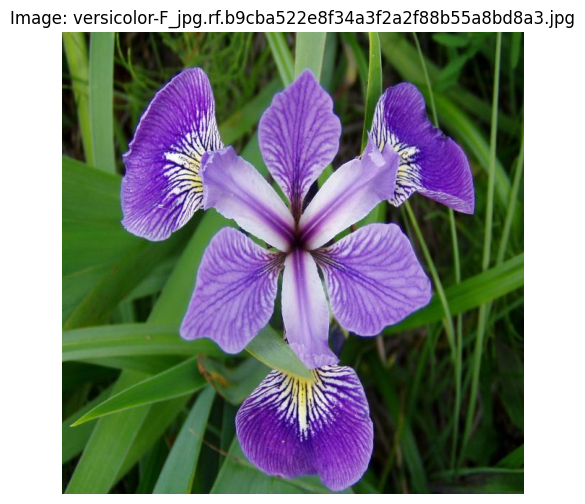

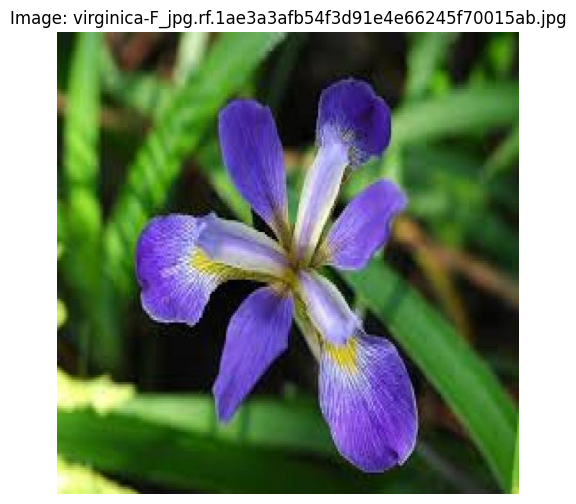

IndexError: list index out of range

In [3]:
# Install Roboflow
!pip install roboflow

# Import necessary modules
from roboflow import Roboflow
import matplotlib.pyplot as plt
import cv2
import os

# Connect to Roboflow and download dataset
rf = Roboflow(api_key="FboIXK56S8IO7velQ9qC")
project = rf.workspace("intership-rgrmn").project("flower-iris-otght")
version = project.version(1)
dataset = version.download("coco")  # This downloads the dataset

# Set path to downloaded images
image_dir = os.path.join(dataset.location, "train")

# List all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display a few images using matplotlib
for i in range(5):  # Change number to display more/less
    img_path = os.path.join(image_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis("off")
    plt.show()

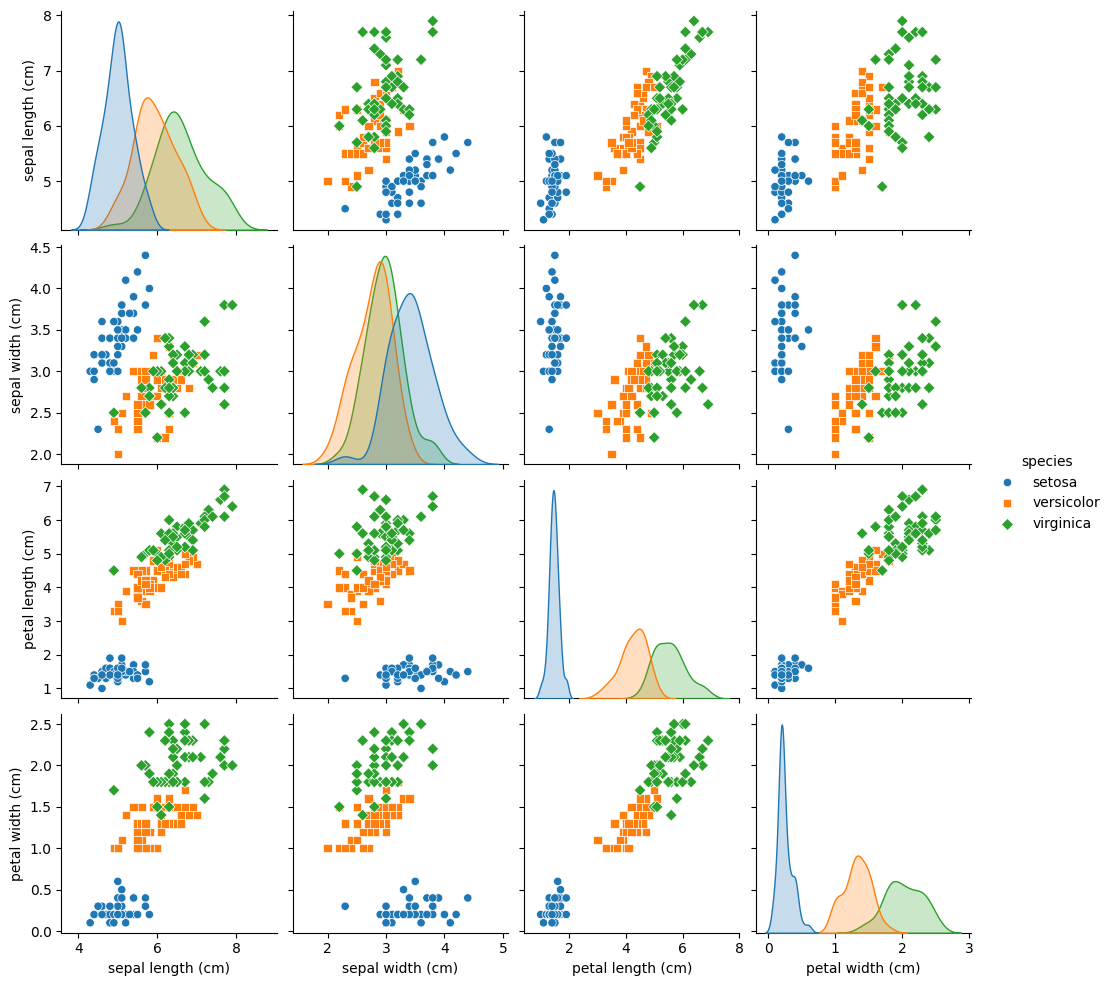

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Predicted Species: setosa


X does not have valid feature names, but StandardScaler was fitted with feature names


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()
X = df.iloc[:, :-1]
y = df['species']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
sample = [[5.1, 3.5, 1.4, 0.2]]  # Example input
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print(f"Predicted Species: {prediction[0]}")